In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline

In [48]:
df=pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt",delimiter="\t")

In [49]:
df.columns

Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard/ Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Height', 'Width',
       'Thick', 'Weight (oz)'],
      dtype='object')

In [50]:
df.describe()

,List Price,Amazon Price,NumPages,Pub year,Height,Width,Thick,Weight (oz)
count,324.000000,325.000000,323.000000,324.000000,321.000000,320.000000,324.000000,316.000000
mean,18.579753,13.333846,335.857585,2002.206790,8.163240,5.585000,0.907716,12.487975
std,14.252829,13.727679,161.984389,10.629002,0.918739,0.874057,0.368625,6.644648
min,1.500000,0.770000,24.000000,1936.000000,5.100000,4.100000,0.100000,1.200000
25%,13.950000,8.600000,208.000000,1998.000000,7.900000,5.200000,0.600000,7.800000
50%,15.000000,10.200000,320.000000,2005.000000,8.100000,5.400000,0.900000,11.200000
75%,19.950000,13.130000,416.000000,2010.000000,8.500000,5.900000,1.100000,16.000000
max,139.950000,139.950000,896.000000,2011.000000,12.100000,9.500000,2.100000,35.200000


In [51]:
#df.info()
df.isnull().sum()
df.dropna(inplace=True)

In [52]:
Y=df["Amazon Price"]
df.drop(["Amazon Price","Title","ISBN-10","Publisher","Author","Pub year"],axis=1,inplace=True)

In [53]:
df

,List Price,Hard/ Paper,NumPages,Height,Width,Thick,Weight (oz)
0,12.95,P,304.0,7.8,5.5,0.8,11.2
1,15.00,P,273.0,8.4,5.5,0.7,7.2
2,1.50,P,96.0,8.3,5.2,0.3,4.0
3,15.99,P,672.0,8.8,6.0,1.6,28.8
4,30.50,P,720.0,8.0,5.2,1.4,22.4
...,...,...,...,...,...,...,...
320,18.99,H,192.0,9.3,6.6,1.1,24.0
321,27.55,P,160.0,9.1,6.1,0.7,8.0
322,12.95,P,224.0,8.0,5.4,0.7,6.4
323,97.50,P,480.0,10.7,8.9,0.9,14.4


In [54]:
df1=pd.get_dummies(df)
df1

,List Price,NumPages,Height,Width,Thick,Weight (oz),Hard/ Paper_H,Hard/ Paper_P
0,12.95,304.0,7.8,5.5,0.8,11.2,0,1
1,15.00,273.0,8.4,5.5,0.7,7.2,0,1
2,1.50,96.0,8.3,5.2,0.3,4.0,0,1
3,15.99,672.0,8.8,6.0,1.6,28.8,0,1
4,30.50,720.0,8.0,5.2,1.4,22.4,0,1
...,...,...,...,...,...,...,...,...
320,18.99,192.0,9.3,6.6,1.1,24.0,1,0
321,27.55,160.0,9.1,6.1,0.7,8.0,0,1
322,12.95,224.0,8.0,5.4,0.7,6.4,0,1
323,97.50,480.0,10.7,8.9,0.9,14.4,0,1


In [55]:
predictors=["List Price","NumPages","Height","Width","Thick","Weight (oz)","Hard/ Paper_H","Hard/ Paper_P"]
df1.columns

Index(['List Price', 'NumPages', 'Height', 'Width', 'Thick', 'Weight (oz)',
       'Hard/ Paper_H', 'Hard/ Paper_P'],
      dtype='object')

In [56]:
df1[predictors]

,List Price,NumPages,Height,Width,Thick,Weight (oz),Hard/ Paper_H,Hard/ Paper_P
0,12.95,304.0,7.8,5.5,0.8,11.2,0,1
1,15.00,273.0,8.4,5.5,0.7,7.2,0,1
2,1.50,96.0,8.3,5.2,0.3,4.0,0,1
3,15.99,672.0,8.8,6.0,1.6,28.8,0,1
4,30.50,720.0,8.0,5.2,1.4,22.4,0,1
...,...,...,...,...,...,...,...,...
320,18.99,192.0,9.3,6.6,1.1,24.0,1,0
321,27.55,160.0,9.1,6.1,0.7,8.0,0,1
322,12.95,224.0,8.0,5.4,0.7,6.4,0,1
323,97.50,480.0,10.7,8.9,0.9,14.4,0,1


In [57]:
df1["Y"]=Y

In [58]:
df1[["Y"]]

,Y
0,5.18
1,10.20
2,1.50
3,10.87
4,16.77
...,...
320,12.24
321,27.55
322,5.18
323,97.50


In [59]:
zscore=StandardScaler()
zscore.fit(df1[predictors])

StandardScaler()

In [60]:
xz=zscore.transform(df1[predictors])

In [61]:
LR_model=LinearRegression()

In [62]:
LR_model.fit(xz,df1["Y"])

LinearRegression()

In [63]:
price_pred=LR_model.predict(xz)

In [64]:
price_pred[1:10]

array([11.03964133,  0.66933897,  8.44427825, 21.78240676, 18.26676833,
       12.75921246, 10.52020317, 20.98296697, 10.08684743])

In [65]:
mean_squared_error(price_pred,df1["Y"])

10.410351383442409

In [66]:
r2_score(df1["Y"],price_pred)

0.9221000651451909

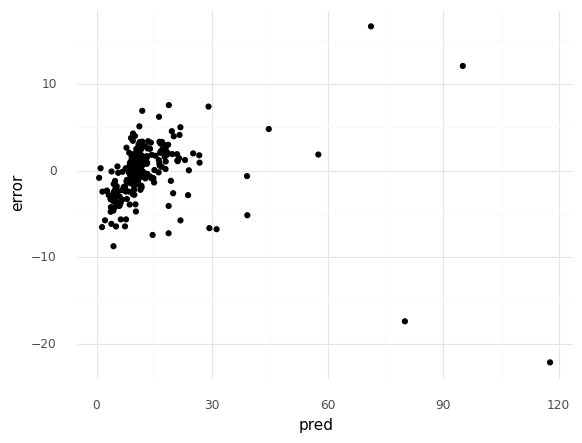

<ggplot: (102565676957)>

In [67]:
assump=pd.DataFrame({"error":price_pred-df1["Y"],"pred":price_pred})

(ggplot(assump,aes(x="pred",y="error"))+geom_point()+theme_minimal())

In [73]:
coefficients=pd.DataFrame({"Coef":LR_model.coef_,"Name":predictors})
coefficients=coefficients.append({"Coef":LR_model.intercept_,"Name":"intercept"},ignore_index=True)
coefficients

,Coef,Name
0,11.432534,List Price
1,-0.279357,NumPages
2,-0.126149,Height
3,-0.166688,Width
4,-0.659140,Thick
5,-0.281095,Weight (oz)
6,-0.287270,Hard/ Paper_H
7,0.287270,Hard/ Paper_P
8,12.587645,intercept


In [98]:
newbook=np.array([[12.45,300,10,5.8,0.8,5,0,1],[10,250,8,4.2,0.8,4,0,1]]).reshape(2,-1)
newbookz=zscore.transform(newbook)
LR_model.predict(newbookz)

C:\Users\yavuz\anaconda3\envs\notebook\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names


array([8.41044985, 7.03634026])